In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import math


In [ ]:
df = pd.read_csv('data4.csv', header=None)

iter_num = 100
n = len(df)
m = 1.7 # fuzzy parameter
print(df)



            0         1         2
0    0.861525  0.912571  0.845310
1    0.886029  0.916529  0.854453
2    0.551487  0.555786  0.460637
3    0.714042  0.709085  0.748322
4    0.707432  0.766896  0.790200
..        ...       ...       ...
445  0.524465  0.531196  0.523584
446  0.731298  0.757877  0.726663
447  0.728468  0.781775  0.748158
448  0.936291  0.900743  0.844364
449  0.778144  0.779430  0.791336

[450 rows x 3 columns]


In [ ]:
def calculate_distance(dim, x, y):
  dist = 0
  for i in range(dim):
    dist += (x[i]-y[i])**2
  return dist**0.5

In [ ]:
cols_num = len(df.columns)
axis = []
for i in range(cols_num):
  l = list((df.iloc[:,i]))
  axis.append(l)
print(axis)

[[0.8615248485323699, 0.8860294868504879, 0.5514871133071728, 0.7140417520537743, 0.707432139684803, 0.7810424672605124, 0.5104128346076832, 0.8921115838509843, 0.4949293928970973, 0.8669426513914494, 0.49762382132804206, 0.8497928014607196, 0.7199823882977159, 0.521248062217364, 0.521574542737036, 0.7208530232999524, 0.9336111968730918, 0.5168616565755615, 0.8971039286706972, 0.7179085507913319, 0.9209776360050408, 0.8580214983151501, 0.4934775815089688, 0.9292066723423836, 0.7089658661775734, 0.7267902364790788, 0.7986709287193414, 0.8657388885230236, 0.5498471945083562, 0.9277952620551744, 0.7803136946225571, 0.7555223270685524, 0.7639732411985721, 0.9313444522017776, 0.8563191016024159, 0.9309230823340608, 0.8927598146060662, 0.7879412989159126, 0.5322055672025936, 0.528450947077741, 0.8863040744669519, 0.7687433454392051, 0.7631536792667812, 0.7270686024843525, 0.4592304323289538, 0.8450105278608099, 0.7635223405740967, 0.5003262678389744, 0.7533467623992904, 0.5193788805212031, 0

In [ ]:
def set_matrices(c):
  membership = np.zeros((df.shape[0], c))
  data = df.to_numpy()
  center = []
  for j in range(c):
    temp = []
    for i in range(cols_num):
      minimum = min(axis[i])
      maximum = max(axis[i])
      r = random.uniform(minimum, maximum)
      temp.append(r)
    center.append(temp)
  print(center)
  centroids = np.asarray(center)
  return membership, centroids, data 
# set_matrices(3)



In [ ]:
def get_cost(c):
  membership, centroid, features = set_matrices(c)
  for num in range(iter_num):
      for i in range(c):
          x_a = 0
          y_a = 0
          z_a = 0
          # k_a = 0
          b = 0
          for k in range(n):
            u = 0
            in_center = False
            dist1 = calculate_distance(cols_num, features[k], centroid[i])
            if dist1 == 0:
                in_center = True

            for j in range(c):
                dist2 = calculate_distance(cols_num, features[k], centroid[j])
                if dist2 != 0:
                    u += (dist1/dist2)**(2/(m-1))
            membership[k, i] = 1/u

            if in_center:
                membership[k, i] = 1
                for j in range(c):
                    if j != i:
                        membership[k, j] = 0

            for w in range(cols_num):
                    ax[w] += (membership[k, i] ** m) * features[k, w]
            b += membership[k, i]** m

          for w in range(cols_num):
                centroid[i, w] = ax[w] / b

    #
    # print(membership)
    # print(centroid)

  cost = 0
  for j in range(n):
      for i in range(c):
          # dist = math.hypot(features[j, 0] - centroid[i, 0], features[j, 1] - centroid[i, 1], features[j, 2] - centroid[i, 2], features[j, 3] - centroid[i, 3])
          dist = calculate_distance(cols_num, features[j], centroid[i])
          cost += (membership[j, i]**m) * (dist**2)
  
  # colors = []
  # for i in range(n):
  #   closest = max(membership[i])
  #   # print(closest)
  #   colors.append(closest)
  # plt.scatter(axis[0], axis[1], c=colors)
  # cbar = plt.colorbar()
  # cbar.set_label('membership')
  # plt.scatter(centroid[:,0], centroid[:,1], color = 'black', marker='x') 
  # print(membership)
  return cost


[[0.5425945770842396, 0.8953045622665117, 0.490809533067628]]
[[0.46939267503012855, 0.5232003042804637, 0.7232861492459093], [0.5606998803256115, 0.5557630604215996, 0.6965043833501792]]
[[0.48833348274664196, 0.7216141608334199, 0.9106294150282946], [0.622574749351116, 0.6488989962733118, 0.7068705167130664], [0.5061436024498221, 0.8606165139722786, 0.7017854406016231]]
[[0.6451547292129692, 0.6412783169749654, 0.5680606670905826], [0.7748161787585428, 0.8241225854121679, 0.6495661584481962], [0.9134685456351259, 0.6872241181145375, 0.7042117482055721], [0.7770074013425051, 0.8568009975974533, 0.7874418205299065]]
[[0.6657929639008995, 0.6767824862727547, 0.83216569490533], [0.8420221936906265, 0.6076270085495243, 0.550627627470811], [0.4811611489273594, 0.6806346019241029, 0.5027865735880194], [0.6272759362476875, 0.6832457764263289, 0.6134340844197455], [0.5462576966567404, 0.5024178123365677, 0.7389760894498215]]


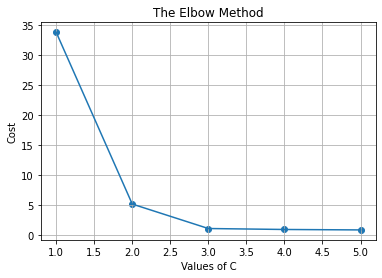

In [ ]:
# for x in range(1, 10):
#     print(get_cost(x))
costs = []
for x in range(1, 6):
  costs.append(get_cost(x))
# get_cost(3)

plt.scatter([i for i in range(1, 6)], costs)
plt.plot([i for i in range(1, 6)], costs)

plt.grid()
plt.xlabel('Values of C')
plt.ylabel('Cost')
plt.title('The Elbow Method')
plt.show()



